# Lab 3: Arrays

## Your Name: Caroline Petersen

**Evaluate the cell below before starting!**

In [1]:
# Don't change this cell; just run it.
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use("ggplot")

You should have the following files (that were zipped with this notebook) in the same folder as this notebook:

- `fake_temps.csv`
- `unemployment.csv`


## Number Sizes

In the next problem, we will use some very large numbers.  For most OSs (Mac, Linux, and sometimes Windows), the default size of integers are 64-bit integers, which are large enough for it.  On the other hand, for some reason some versions of Windows use 32-bit integers, which are *not* large enough.

So, we can force our arrays to contain 64-bit integers by using the optional argument `dtype=np.int64`.  For instance, like this:

In [2]:
max_32bit_int = 2_147_483_647

large_number_array_64bit = np.arange(max_32bit_int, max_32bit_int + 22, 3, dtype=np.int64)  # this always works!
large_number_array_64bit

array([2147483647, 2147483650, 2147483653, 2147483656, 2147483659,
       2147483662, 2147483665, 2147483668])

If your default integer size is 32-bit, you'd have trouble.  Let's force the integers to be 32-bit integers:

In [3]:
max_32bit_int = 2_147_483_647

large_number_array_32bit = np.arange(max_32bit_int, max_32bit_int + 22, 3, dtype=np.int32)  # this does NOT work!
large_number_array_32bit

/var/folders/4m/qvc8ly2d0mz07rthdgkms0tc0000gn/T/ipykernel_29306/3829173103.py:3: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 2147483650 to int32 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  large_number_array_32bit = np.arange(max_32bit_int, max_32bit_int + 22, 3, dtype=np.int32)  # this does NOT work!


array([ 2147483647, -2147483646, -2147483643, -2147483640, -2147483637,
       -2147483634, -2147483631, -2147483628], dtype=int32)

If you are running Mac or Linux, you probably do not need to worry about it, but if you are using Windows, I would recommend you add the option `dtype=np.int64` when using `np.arange` (as done above) in Part 1 below, to make sure you do not run into problems!

## 1. Checking Some Math Formulas

One can give a mathematical proof of the following fact: for any positive integer $n$, one has that

$$
1^3 + 2^3 + 3^3 + \cdots + n^3 = (1 + 2 + 3 + \cdots + n)^2.
$$

Let's try to verify this formula for  some numbers using *arrays*.

**Question 1.1:** In the cell below, replace the `...` so that `cubes_array` contains all the cubes of the integers up to the value of `n` given below.  (`n` is preset to $1{,}000$.  Do not change it for now.)

In [48]:
n = 1000  # do not change

# array with 1**3, 2**3, 3**3, ..., n**3
cubes_array = np.arange(1, n+1)**3

---

Below, we want to run a little test to see the result above was correct.  But remember how comparisons work with arrays.  For example:


In [49]:
array1 = np.array([1, 2, 3])
array2 =  np.array([1, 2, 3])
array3 =  np.array([1, 2, 4])

If we do `array1 == array2` we do not get `True` or `False`, but an array:

In [50]:
array1 == array2

array([ True,  True,  True])

In [51]:
array1 == array3

array([ True,  True, False])

We get `True` for every entry that matches and `False` for the ones that don't.  So, to see if the arrays are actually equal (meaning, *all* entries match), we use `np.array_equal`:

In [52]:
np.array_equal(array1, array2)

True

In [53]:
np.array_equal(array1, array3)

False

---

**Question 1.2:** Let's verify that you are getting the correct answer.  Replace the `...` below so that `first_5_cubes` contains the first 5 elements of `cubes_array` and `last_5_cubes` contains the last 5 elements.  Then run the cell.  If your previous part was correct, you should get `True` as the output.

*Hint:* You can "slice" the `cubes_array`.

In [54]:
first_5_cubes = cubes_array[:5]
last_5_cubes = cubes_array[-5:]

# test with hardcoded cubes
np.array_equal(
    first_5_cubes, np.array([1**3, 2**3, 3**3, 4**3, 5**3])
) and np.array_equal(
    last_5_cubes, np.array([996**3, 997**3, 998**3, 999**3, 1000**3])
)

True

**Question 1.3:**  Now we verify the formula for $n=1000$!  Replace `...` below so that `sum_cubes` contains the sum of all elements of `cubes_array` and `sum_to_n` contains $1 + 2 + 3 + \cdots + n$ (using the variable `n` for the last element!).  Then, run the cell.  If you've done it correctly, you should get `True` as the output.

In [55]:
sum_cubes = np.sum(cubes_array)
sum_to_n = np.sum(np.arange(1, n + 1))

sum_cubes == sum_to_n**2

True

---

Using NumPy arrays to compute sums of cubes is quite fast!  (Especially compared to using Python *without* NumPy.)  But there is a faster way!  We have a formula for the sum of consecutive integers:

$$
1 + 2 + 3 + \cdots + n = \frac{n(n+1)}{2}.
$$

This formula is not hard to deduce. Add the first (i.e., $1$) to the last (i.e., $n$), the second (i.e., $2$) to the second to the last (i.e., $n-1$), and so on.  Each pair adds to $n+1$ and have half of the terms (i.e., $n/2$) pairs to add, giving $n/2$ times $n+1$.  (Well, at least if $n$ is even.)

This means that, using $1^3 + 2^3 + 3^3 + \cdots + n^3 = (1 + 2 + 3 + \cdots + n)^2$, we have:

$$
1^3 + 2^3 + 3^3 + \cdots + n^3 = \frac{n^2(n+1)^2}{4}.
$$

---

**Question 1.4:** Enter the code in the cell below that gives `True` if the formula above works for the value given to `n`.

*Hint:* Of course, as above, use `==` to check if the two sides are equal.  Use your `cubes_array` again for the left side of the equation, and write an expression for the left side.

In [56]:
np.sum(cubes_array) == n**2 * (n+1)**2 / 4

True

You could change the value of `n` in Question 1.1 above and run your answers the cells from Questions 1.3 and 1.4 again to check if the formulas hold for other values of `n`.  (The cell from Question 1.2 will give `False` if you change `n`, though.)

## 2. Computing Interest

In this question we will use arrays to do some computations with compound interest.

Note that NumPy has the function `np.full(repetitions, value)` gives an array of length `repetitions` where every entry has value `value`.

For instance:

In [ ]:
np.full(10, 3)

---

**Question 2.1:**  Let's say you put $P$ dollars in a savings account, and leave it there for $t$ years.  (Below we will use $P=100$ and $t=3$.)  Create an array with entries all equal to $P$ (use the variable `P`) and length equal to the number of **months** (not years, but use the variable `t`).  (It will print your array for verification.)

In [13]:
P = 100  # initial amount (called "principal")
t = 3  # number of years

P_array = np.full(12 * t, P)

P_array

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100])

Our goal is to create an array that will have the value in your saving account for each month.

**Question 2.2:**  Let's say that your savings account pays interest of $r$ percent a year.  This means that every month the value of your account is multiplied by

$$
\left(1 + \frac{r}{100 \cdot 12}\right)
$$

to obtain the value for the next month.  (The $12$ is to go from *yearly* rate to *monthly* rate and the $100$ is to convert the percentage to a ratio.)  

In the cell below (where $r = 3$, for a $3\%$ interest), enter the expression above in the variable `factor`:

In [14]:
r = 3  # interest rate
factor = 1 + r / (100 * 12)

factor

1.0025

**Question 2.3:** It will be helpful for our computation to have an array with

```python
[1, factor, factor**2, factor**3, ...]
```

of length equal to the number of months.  (Again, you *cannot* hardcode the number of months.  You must use `t` to get the number of months!)  Save such array in the variable `factors_array` below.

In [16]:
factors_array = factor ** np.arange(12*t)

factors_array

array([1.        , 1.0025    , 1.00500625, 1.00751877, 1.01003756,
       1.01256266, 1.01509406, 1.0176318 , 1.02017588, 1.02272632,
       1.02528313, 1.02784634, 1.03041596, 1.032992  , 1.03557448,
       1.03816341, 1.04075882, 1.04336072, 1.04596912, 1.04858404,
       1.0512055 , 1.05383352, 1.0564681 , 1.05910927, 1.06175704,
       1.06441144, 1.06707247, 1.06974015, 1.0724145 , 1.07509553,
       1.07778327, 1.08047773, 1.08317892, 1.08588687, 1.08860159,
       1.09132309])

**Question 2.4:**  The formula for the amount of money you will have after $m$ months is simply

$$
P \cdot \left(1 + \frac{r}{100 \cdot 12}\right)^m.
$$

Thus, to get an array with your balance each month, you need

```python
[P, P * factor, P * factor**2, P * factor**3, ...]
```

Use `P` and `factors_array` to produce the array above and save it in the variable `balance_array`.


In [17]:
balance_array = factors_array * P

balance_array

array([100.        , 100.25      , 100.500625  , 100.75187656,
       101.00375625, 101.25626564, 101.50940631, 101.76317982,
       102.01758777, 102.27263174, 102.52831332, 102.78463411,
       103.04159569, 103.29919968, 103.55744768, 103.8163413 ,
       104.07588215, 104.33607186, 104.59691204, 104.85840432,
       105.12055033, 105.3833517 , 105.64681008, 105.91092711,
       106.17570443, 106.44114369, 106.70724655, 106.97401466,
       107.2414497 , 107.50955332, 107.77832721, 108.04777303,
       108.31789246, 108.58868719, 108.86015891, 109.1323093 ])

**Question 2.5:** Let's now introduce *monthly deposits*.  Let's say you deposit $A$ dollars (below we set `A = 30`, for $\$30$ dollars) every month.  We need to add those amounts to our account.  So we need to add

```python
[0, A, 2 * A, 3 * A, ...]
```

to our account (where the length is the number of months).

Save the array above in the variable `deposits_array` below.  (**Do not hardcode the number of months!**  As always, use `t`.)

In [18]:
A = 30  # monthly deposits
deposits_array = A * np.arange(12*t)
deposits_array

array([   0,   30,   60,   90,  120,  150,  180,  210,  240,  270,  300,
        330,  360,  390,  420,  450,  480,  510,  540,  570,  600,  630,
        660,  690,  720,  750,  780,  810,  840,  870,  900,  930,  960,
        990, 1020, 1050])

**Question 2.6:** We cannot simply add these numbers to our `balance_array`, as it would not include interest paid over the deposits.  What we actually need is an array of the form

```python
[P, 
 P * factor + A, 
 P * factor**2 + A * factor + A, 
 P * factor**3 + A * factor**2 + A * factor + A, ...] =
balance_array + 
[0, 
 A, 
 A + A * factor, 
 A + A* factor + A * factor**2, 
 A + A* factor + A * factor**2 + A * factor**3, ...]
```
Here we will produce this second array:

```python
[0, 
 A, 
 A + A * factor, 
 A + A* factor + A * factor**2, 
 A + A* factor + A * factor**2 + A * factor**3, ...].
```

Let's start by producing

```python
[A, A * factor, A * factor**2, ...]
```

with length equal to the total number of months *minus 1*.  Save it in the variable `A_fac_pwr` below.

*Hint:* You can use the `factors_array` again, but remove its last term.

In [19]:
A_fac_pwr = A * factors_array[:-1]

A_fac_pwr

array([30.        , 30.075     , 30.1501875 , 30.22556297, 30.30112688,
       30.37687969, 30.45282189, 30.52895395, 30.60527633, 30.68178952,
       30.758494  , 30.83539023, 30.91247871, 30.9897599 , 31.0672343 ,
       31.14490239, 31.22276465, 31.30082156, 31.37907361, 31.4575213 ,
       31.5361651 , 31.61500551, 31.69404302, 31.77327813, 31.85271133,
       31.93234311, 32.01217396, 32.0922044 , 32.17243491, 32.252866  ,
       32.33349816, 32.41433191, 32.49536774, 32.57660616, 32.65804767])

**Question 2.7:**  Now we want to go from our `A_fac_pwr`

```python
[A, A * factor, A * factor**2, A * factor**3, ...]
```

to

```python
[A, 
 A + A * factor, 
 A + A * factor + A * factor**2, 
 A + A * factor + A * factor**2 + A * factor**3, ...].
```

That is simply the *cumulative sum* of the array!  The cumulative sum of $(x_1, x_2, x_3, x_4)$ is simply

$$
\begin{align*}
 (&x_1, \\
&x_1 + x_2, \\
&x_1 + x_2 + x_3\\
&x_1 + x_2 + x_3 + x_4).
\end{align*}
$$

Fortunately NumPy can do that for us with the function [np.cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html).  For instance `np.cumsum(np.array([1, 2, 3, 4]))` gives `[1, 3, 6, 10]`.

Use `np.cumsum` to get the array above and save it in the variable `A_interest`.

In [22]:
A_interest = np.cumsum(A_fac_pwr)

A_interest

array([  30.        ,   60.075     ,   90.2251875 ,  120.45075047,
        150.75187734,  181.12875704,  211.58157893,  242.11053288,
        272.71580921,  303.39759873,  334.15609273,  364.99148296,
        395.90396167,  426.89372157,  457.96095588,  489.10585827,
        520.32862291,  551.62944447,  583.00851808,  614.46603938,
        646.00220448,  677.61720999,  709.31125301,  741.08453114,
        772.93724247,  804.86958558,  836.88175954,  868.97396394,
        901.14639885,  933.39926485,  965.73276301,  998.14709492,
       1030.64246265, 1063.21906881, 1095.87711648])

**Question 2.8:** Now we can get an array with balances with the monthly deposits.  All we need to do is to add to `balance_array` the array `A_interest` **shifted** by one.  So, we can add a zero to the front of `A_interest` using `np.appennd`.  For instance,  `np.append(0, np.array([1, 2, 3]))` gives `[0, 1, 2, 3]`.

Save the result *rounded to 2 decimal places* (use `np.round`) in `balance_with_interest`.

In [24]:
balance_with_interest = np.round(balance_array + np.append(0, A_interest), 2)

balance_with_interest

array([ 100.  ,  130.25,  160.58,  190.98,  221.45,  252.01,  282.64,
        313.34,  344.13,  374.99,  405.93,  436.94,  468.03,  499.2 ,
        530.45,  561.78,  593.18,  624.66,  656.23,  687.87,  719.59,
        751.39,  783.26,  815.22,  847.26,  879.38,  911.58,  943.86,
        976.22, 1008.66, 1041.18, 1073.78, 1106.46, 1139.23, 1172.08,
       1205.01])

---

In the next part we will find the month in which our balance was 1000 or over.  For this, we can use `np.argmax`, which gives the index for the **first occurence** of the maximum of an array.

For instance:

In [25]:
some_array = np.array([1, 4, 5, 7, 11, 2, 10, 11])
np.argmax(some_array)

4

And indeed:

In [26]:
some_array[np.argmax(some_array)]

11

If we have an array of *booleans* (i.e., `True` and `False` values), `False` is treated like `0` and `True` like `1`, so `True` is greater than `False`.

In [27]:
True > False

True

So, we can use a trick to find the index for the first value greater than or equal to 6 in `some_array`:

In [28]:
np.argmax(some_array >= 6)

3

Checking:

In [29]:
some_array[3]

7

---

**Question 2.9:** Find the first month after we started for which the balance was above $\$1{,}000$ in the savings account (with the monthly deposits) and the corresponding amount.

**Note:** You cannot manually enter the numerical index to find the amount!  It has to be done with code.

*Hint:* I do something similar above.

In [30]:
month_above_1000 = np.argmax(balance_with_interest >= 1000)
balance_above_1000 = balance_with_interest[month_above_1000]

# the code below should print the answer
print(f"The account was first above 1,000 after {month_above_1000} months, and the corresponding balance was {balance_above_1000}.")

The account was first above 1,000 after 29 months, and the corresponding balance was 1008.66.


## 3. Unemployment


The Federal Reserve Bank publishes data about jobs in the US, including unemployment. Adapted from this [data source](https://fred.stlouisfed.org/series/NEIPTERM156SFRBRIC), you should have a file in your directory called `unemployment.csv`. The top (header) row of the csv file is: 
<br><br>
DATE,rate
<br>
<br>
...followed by 106 rows of data, each of which look like this:
<br><br>
1/1/1994, 11.0621318
<br>
(105 more rows)

Let's import it as a data frame and take a loot at it:

In [31]:
unemployment_df = pd.read_csv("unemployment.csv")
unemployment_df

,DATE,rate
0,1/1/1994,11.062132
1,4/1/1994,10.771927
2,7/1/1994,10.473954
3,10/1/1994,10.237754
4,1/1/1995,10.129244
...,...,...
101,4/1/2019,8.398822
102,7/1/2019,8.384811
103,10/1/2019,8.185098
104,1/1/2020,8.193350


We now create an array `unemployment` array with the unemployment rate at the start of one quarter (a 3-month period) of a year.  The first element is the unemployment rate at the start of the first quarter of 1994.

In [32]:
# Run this cell to load the data.  You don't need to read it.
unemployment = unemployment_df["rate"].to_numpy()
unemployment

array([11.0621318 , 10.77192681, 10.47395408, 10.23775372, 10.12924418,
       10.08505433, 10.09470675, 10.10429865, 10.00289988,  9.94828977,
        9.84656195,  9.72221778,  9.70639297,  9.49478348,  9.28279782,
        9.18564733,  9.10251786,  8.83775274,  9.04325487,  8.87303686,
        8.74115895,  8.85862643,  8.69734467,  8.51900016,  8.38336457,
        8.35803268,  8.42160372,  8.39918382,  8.53696216,  8.74852923,
        8.96491626,  9.69812334,  9.8843541 ,  9.85440023,  9.80141715,
        9.70052054,  9.87146099,  9.99305547, 10.06601017, 10.02528758,
        9.80750916,  9.70754028,  9.66014001,  9.71349668,  9.51378419,
        9.41164514,  9.32471497,  9.31158911,  9.175878  ,  9.13138532,
        9.11731782,  9.04490222,  9.03843861,  9.12256338,  9.10862179,
        9.16845725,  9.36947717,  9.55386078, 10.14547204, 10.6605132 ,
       11.91843408, 12.55413321, 12.70880901, 12.87197174, 12.61789539,
       12.5560314 , 12.35204874, 12.42164764, 12.22870426, 12.22

---

**Question 3.1:** Let's label each number with its date.  We'll say that the first quarter of 1994 is 1994.0, the second quarter is 1994.25, the third quarter is 1994.5, and so on.  Create an array called `measurement_dates` with the dates for each number in `unemployment`.

*Hint:* What is the last quarter? What are the step sizes between quarters?

In [33]:
measurement_dates = np.arange(1994, 1994 + len(unemployment) * 0.25, 0.25)
measurement_dates

array([1994.  , 1994.25, 1994.5 , 1994.75, 1995.  , 1995.25, 1995.5 ,
       1995.75, 1996.  , 1996.25, 1996.5 , 1996.75, 1997.  , 1997.25,
       1997.5 , 1997.75, 1998.  , 1998.25, 1998.5 , 1998.75, 1999.  ,
       1999.25, 1999.5 , 1999.75, 2000.  , 2000.25, 2000.5 , 2000.75,
       2001.  , 2001.25, 2001.5 , 2001.75, 2002.  , 2002.25, 2002.5 ,
       2002.75, 2003.  , 2003.25, 2003.5 , 2003.75, 2004.  , 2004.25,
       2004.5 , 2004.75, 2005.  , 2005.25, 2005.5 , 2005.75, 2006.  ,
       2006.25, 2006.5 , 2006.75, 2007.  , 2007.25, 2007.5 , 2007.75,
       2008.  , 2008.25, 2008.5 , 2008.75, 2009.  , 2009.25, 2009.5 ,
       2009.75, 2010.  , 2010.25, 2010.5 , 2010.75, 2011.  , 2011.25,
       2011.5 , 2011.75, 2012.  , 2012.25, 2012.5 , 2012.75, 2013.  ,
       2013.25, 2013.5 , 2013.75, 2014.  , 2014.25, 2014.5 , 2014.75,
       2015.  , 2015.25, 2015.5 , 2015.75, 2016.  , 2016.25, 2016.5 ,
       2016.75, 2017.  , 2017.25, 2017.5 , 2017.75, 2018.  , 2018.25,
       2018.5 , 2018

The following cells will visualize the data and help you answer the following questions. You do not need to change anything, but you should run them.

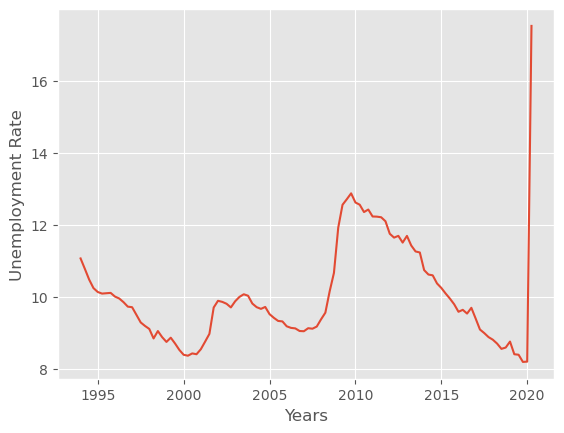

In [34]:
## This graph shows unemployment rates over time. Just run this cell. 
plt.plot(measurement_dates, unemployment)

plt.xlabel("Years")
plt.ylabel("Unemployment Rate")

plt.show()

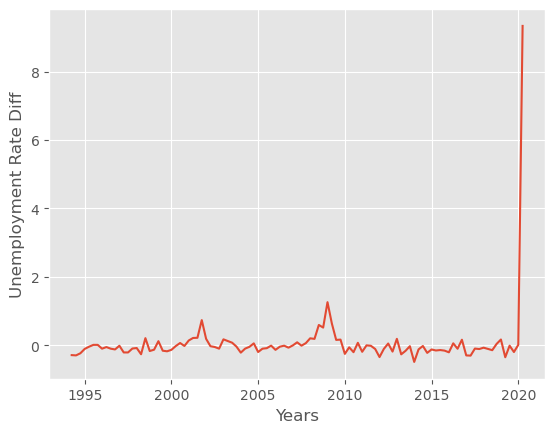

In [35]:
## This graph shows the change in unemployment rates over time. Just run this cell.
plt.plot(measurement_dates[1:], np.diff(unemployment))

plt.xlabel("Years")
plt.ylabel("Unemployment Rate Diff")

plt.show()

**Question 3.2:** What was the biggest increase in the unemployment rate from one quarter to the next?  Calculate the answer using Python code, *not* by looking at the data yourself.  

*Hint:* An increase means that if we are finding the difference between elements 1 and 2 of an array, element 2 is greater than element 1. Therefore, the difference will be positive.

*Hint 2:* `np.diff(some_array)` gives an array with the differences between consecutive entries of `some_array`.

In [36]:
biggest_increase = np.max(np.diff(unemployment))
biggest_increase

9.333077491000001

**Question 3.3:** In what year and quarter did that **increase** happen?

*Hint:* Use the function, `np.argmax` again!

*Hint 2:* Note that `nd.diff(some_array)` is one element shorter than `some_array`, as we cannot subtract anything from the first element of `some_array`.  Make sure you compensate for that!

In [37]:
max_increase_quarter = measurement_dates[np.argmax(np.diff(unemployment))+1]
print(f"The maximum increase occurred in the {max_increase_quarter} quater.")

The maximum increase occurred in the 2020.25 quater.


**Question 3.4:** What was the biggest *decrease* in unemployment, and when did it happen (year and quarter)?

*Hint:* What does `np.argmin` do? Check the numpy documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html). 

In [38]:
max_decrease_quarter = measurement_dates[np.argmin(np.diff(unemployment))+1]
print(f"The maximum increase occurred in the {max_decrease_quarter} quater.")

The maximum increase occurred in the 2014.0 quater.


## 4. Data Cleaning

One potential issue that you may run into is incorrect data types in your dataset. For example, strings may be used instead of floats/integers or that values are in the wrong format. Before we conduct any analysis, we need to make sure our data is in a workable format before we continue. For this exercise, we've created some fake data for you to play with.

In [39]:
## Do NOT change this cell. Just run it.
unclean_temps = pd.read_csv("fake_temps.csv")
unclean_temps

,Temperatures
0,1F
1,1.2F
2,3.6F
3,2F
4,5.8F
5,6.2F
6,9F
7,13F
8,42F
9,1.7F


We would like the temperatures to be *numerical* data (*floats*, in particular), so that we can properly manipulate it.  Let's check what is the type (run the cell below without changing it):

In [40]:
unclean_temps.dtypes

Temperatures    object
dtype: object

We see we have an *object* type (which is, basically, a string!), not a float.  So, we need to convert it.  We can try `astype`, which is the tool for convertions like this:

In [41]:
unclean_temps.astype({"Temperatures": "float32"})

ValueError: could not convert string to float: '1F'

We get an error!  That's due to the `F`'s we have by the numbers.  So, we first need to remove them.

For this, we can use the method [str.replace](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html) from Pandas, which can replace strings in columns (i.e., *series*)

For example:

In [42]:
df = pd.DataFrame({"col1": ["CAR", "BAR", "ONE"], "col2": ["ARE", "FAR", "ONE"]})
df

,col1,col2
0,CAR,ARE
1,BAR,FAR
2,ONE,ONE


In [43]:
df["col1"].str.replace("A", "X")

0    CXR
1    BXR
2    ONE
Name: col1, dtype: object

We can change directly on `df` using `assign`:

In [44]:
df.assign(col1=df["col1"].str.replace("A", "X"))

,col1,col2
0,CXR,ARE
1,BXR,FAR
2,ONE,ONE


(Note that this gives a *new* data frame, and does *not* replace the original `df`!)

Now it is your turn.  Remove the `F`s in `unclean_temps` by simply replacing `F` by an empty string on the temperatures column.  Save it in the `unclean_temps_no_F` variable.

---

**Question 4.1:** Remove the `F`'s from the temperatures column.

In [45]:
unclean_temps_no_F = unclean_temps.assign(
    Temperatures= unclean_temps["Temperatures"].str.replace("F", "")
)
unclean_temps_no_F

,Temperatures
0,1
1,1.2
2,3.6
3,2
4,5.8
5,6.2
6,9
7,13
8,42
9,1.7


**Question 4.2:** Create a data frame `clean_temps` that has the same temperatues as in `unclean_temps` but with the `Temperatures` column as float.

*Hint:* Use `unclean_temps_no_F` and the method `astype`.

In [46]:
clean_temps = unclean_temps_no_F.assign(Temperatures=unclean_temps_no_F["Temperatures"].astype("float"))
clean_temps

,Temperatures
0,1.0
1,1.2
2,3.6
3,2.0
4,5.8
5,6.2
6,9.0
7,13.0
8,42.0
9,1.7


Check the types again:

In [47]:
clean_temps.dtypes

Temperatures    float64
dtype: object

Congratulations! You've done some introductory data cleaning, converting temperature strings to floats. 

## 5. Submission

 **To submit this lab**, please download your notebook and submit in Canvas under Lab 3 (under Assignments). To download, go to the toolbar at the top of this page, click File > Download. Then, rename the file adding your last name (see below), go to our class's Canvas page, and upload your file under "Lab 3".
 
For easy identification, **please add your surname to the file**, as in: `lab_03_DS201_Name.ipynb`